### 问题
基于全球宠物市场需求和中国发展
1. 分析中国宠物食品行业发展
2. 预测未来三年中国宠物食品行业生产值和出口值

### 解决方案
#### 问题1
**假设4**：1人民币等于0.14美元 

直接根据给定数据分析宠物食品行业的发展:
1. 趋势分析
2. 产值与出口比例分析

#### 问题2
宠物食品的产值与宠物数量有直接的关联。\
将已有国家宠物数量和全球宠物食品销售额当作变量引入，采用VAR模型进行未来三年中国宠物食品行业生产值和出口值预测。

### 1. 发展分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('./data/attachment3.xlsx')
data

,Year,Production,Exports,Global_Food,China_Cat,China_Dog,USA_Cat,USA_Dog,France_Cat,France_Dog,German_Cat,German_Dog
0,2019,440.7,22.0,93.9,4412,5503,9420,8970,1300,740,1470,1010
1,2020,727.3,9.8,102.6,4862,5222,6500,8500,1490,775,1570,1070
2,2021,1554.0,12.2,113.4,5806,5429,9420,8970,1510,750,1670,1030
3,2022,1508.0,24.7,123.6,6536,5119,7380,8970,1490,760,1520,1060
4,2023,2793.0,39.6,133.9,6980,5175,7380,8010,1660,990,1570,1050


In [2]:
# 将生产值从人民币转换为美元
data['Production_in_dollars'] = data['Production'] * 0.14

# 计算产值与出口比例
data['Export_to_Production_Ratio'] = data['Exports'] / data['Production_in_dollars']

data

,Year,Production,Exports,Global_Food,China_Cat,China_Dog,USA_Cat,USA_Dog,France_Cat,France_Dog,German_Cat,German_Dog,Production_in_dollars,Export_to_Production_Ratio
0,2019,440.7,22.0,93.9,4412,5503,9420,8970,1300,740,1470,1010,61.698,0.356576
1,2020,727.3,9.8,102.6,4862,5222,6500,8500,1490,775,1570,1070,101.822,0.096246
2,2021,1554.0,12.2,113.4,5806,5429,9420,8970,1510,750,1670,1030,217.560,0.056076
3,2022,1508.0,24.7,123.6,6536,5119,7380,8970,1490,760,1520,1060,211.120,0.116995
4,2023,2793.0,39.6,133.9,6980,5175,7380,8010,1660,990,1570,1050,391.020,0.101274


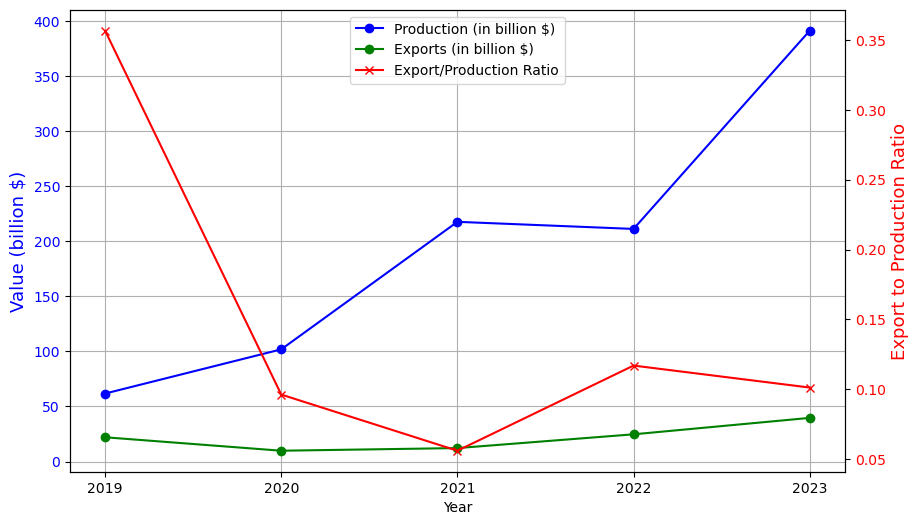

In [3]:
# 创建图表
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制生产值和出口值的趋势
line1, = ax1.plot(data['Year'], data['Production_in_dollars'], marker='o', color='b', label='Production (in billion $)')
line2, = ax1.plot(data['Year'], data['Exports'], marker='o', color='g', label='Exports (in billion $)')
ax1.set_xlabel('Year')
ax1.set_xticks(range(2019, 2024))
ax1.set_ylabel('Value (billion $)', color='b', fontsize=13)
ax1.tick_params(axis='y', labelcolor='b')
# ax1.set_title('Trend of Production and Exports & Export to Production Ratio')

# 创建第二个y轴用于绘制比例
ax2 = ax1.twinx()
line3, = ax2.plot(data['Year'], data['Export_to_Production_Ratio'], marker='x', color='r', label='Export/Production Ratio')
ax2.set_ylabel('Export to Production Ratio', color='r', fontsize=13)
ax2.tick_params(axis='y', labelcolor='r')

# 合并图例
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

# 显示网格
ax1.grid(True)

# 显示图表
plt.show()

### 2. 未来三年预测

In [4]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

In [5]:
# 设置时间序列索引
data.set_index('Year', inplace=True)

features = ['Production_in_dollars', 'Exports', 'Global_Food', 'China_Cat', 'China_Dog', 'USA_Cat', 'USA_Dog', 'France_Cat', 'France_Dog', 'German_Cat', 'German_Dog']
model_data = data[features]

# ADF检验函数
def adf_test(series, title=''):
    """Perform ADF test and print results."""
    result = adfuller(series.dropna(), autolag='AIC')
    return result[1] <= 0.05  # Return True if the series is stationary

# 检查每个特征的平稳性，并对非平稳的序列进行差分
data_diff = model_data.copy()
for column in model_data.columns:
    is_stationary = adf_test(model_data[column], title=column)
    if not is_stationary:
        data_diff[column] = model_data[column].diff().dropna()

# 删除第一行的NaN值（由于差分导致）
data_diff = data_diff.dropna()

In [6]:
data_diff

,Production_in_dollars,Exports,Global_Food,China_Cat,China_Dog,USA_Cat,USA_Dog,France_Cat,France_Dog,German_Cat,German_Dog
Year,,,,,,,,,,,
2020,40.124,-12.2,8.7,450.0,-281.0,6500,-470.0,190.0,35.0,100.0,1070
2021,115.738,2.4,10.8,944.0,207.0,9420,470.0,20.0,-25.0,100.0,1030
2022,-6.440,12.5,10.2,730.0,-310.0,7380,0.0,-20.0,10.0,-150.0,1060
2023,179.900,14.9,10.3,444.0,56.0,7380,-960.0,170.0,230.0,50.0,1050


In [7]:
# 使用差分后的数据进行VAR模型拟合
model = VAR(data_diff)
model_fitted = model.fit(maxlags=1)

# 提取残差
residuals = model_fitted.resid

residuals

c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Production_in_dollars,Exports,Global_Food,China_Cat,China_Dog,USA_Cat,USA_Dog,France_Cat,France_Dog,German_Cat,German_Dog
Year,,,,,,,,,,,
2021,1.421085e-14,4.440892e-16,7.105427e-15,2.273737e-13,0.000000e+00,5.456968e-12,1.136868e-13,1.421085e-14,2.842171e-14,0.000000e+00,4.547474e-13
2022,-3.552714e-14,3.552714e-15,-1.776357e-15,-2.273737e-13,-2.842171e-13,-9.094947e-13,-7.389644e-13,7.105427e-14,1.847411e-13,-2.842171e-14,-2.273737e-13
2023,0.000000e+00,1.776357e-15,1.776357e-15,1.705303e-13,-1.989520e-13,1.818989e-12,0.000000e+00,-2.842171e-14,5.684342e-14,-5.684342e-14,2.273737e-13


In [8]:
# 模型评估
# 使用Ljung-Box检验检查每个变量残差的自相关性
ljung_box_results = {}
print("Ljung-Box Test Results:")
for column in residuals.columns:
    lb_test_results = acorr_ljungbox(residuals[column], lags=[1], return_df=True)
    ljung_box_results[column] = lb_test_results.iloc[0].to_dict()
    print(f"\n{column} residuals:")
    print(lb_test_results)

# 将Ljung-Box测试结果保存到DataFrame
ljung_box_df = pd.DataFrame(ljung_box_results).T
ljung_box_df.to_csv('./results/Q3/ljung_box_results.csv')
print("\nLjung-Box Test Results DataFrame:")
print(ljung_box_df)

Ljung-Box Test Results:

Production_in_dollars residuals:
    lb_stat  lb_pvalue
1  2.840237   0.091931

Exports residuals:
    lb_stat  lb_pvalue
1  2.228056   0.135524

Global_Food residuals:
    lb_stat  lb_pvalue
1  1.385619   0.239146

China_Cat residuals:
    lb_stat  lb_pvalue
1  3.246191    0.07159

China_Dog residuals:
    lb_stat  lb_pvalue
1  0.953406   0.328854

USA_Cat residuals:
    lb_stat  lb_pvalue
1  1.521792   0.217349

USA_Dog residuals:
    lb_stat  lb_pvalue
1  3.233588   0.072142

France_Cat residuals:
    lb_stat  lb_pvalue
1  2.228056   0.135524

France_Dog residuals:
    lb_stat  lb_pvalue
1  3.141986   0.076301

German_Cat residuals:
   lb_stat  lb_pvalue
1      0.0        1.0

German_Dog residuals:
    lb_stat  lb_pvalue
1  2.657313   0.103075

Ljung-Box Test Results DataFrame:
                        lb_stat  lb_pvalue
Production_in_dollars  2.840237   0.091931
Exports                2.228056   0.135524
Global_Food            1.385619   0.239146
China_Cat  

In [9]:
# 预测未来三年的差分值
lag_order = model_fitted.k_ar
forecast_diff = model_fitted.forecast(data_diff.values[-lag_order:], steps=3)

# 将预测的差分值转化为实际值
forecast = model_data.values[-1] + np.cumsum(forecast_diff, axis=0)

# 将预测结果转换为数据框
forecast_df = pd.DataFrame(forecast, index=[2024, 2025, 2026], columns=model_data.columns)

# 打印预测结果
print("\nFuture Production Predictions (in billions RMB):")
print(forecast_df['Production_in_dollars'])
print("\nFuture Exports Predictions (in billions USD):")
print(forecast_df['Exports'])


Future Production Predictions (in billions RMB):
2024    445.826233
2025    431.103257
2026    761.704549
Name: Production_in_dollars, dtype: float64

Future Exports Predictions (in billions USD):
2024    34.723346
2025    63.146529
2026    65.182858
Name: Exports, dtype: float64


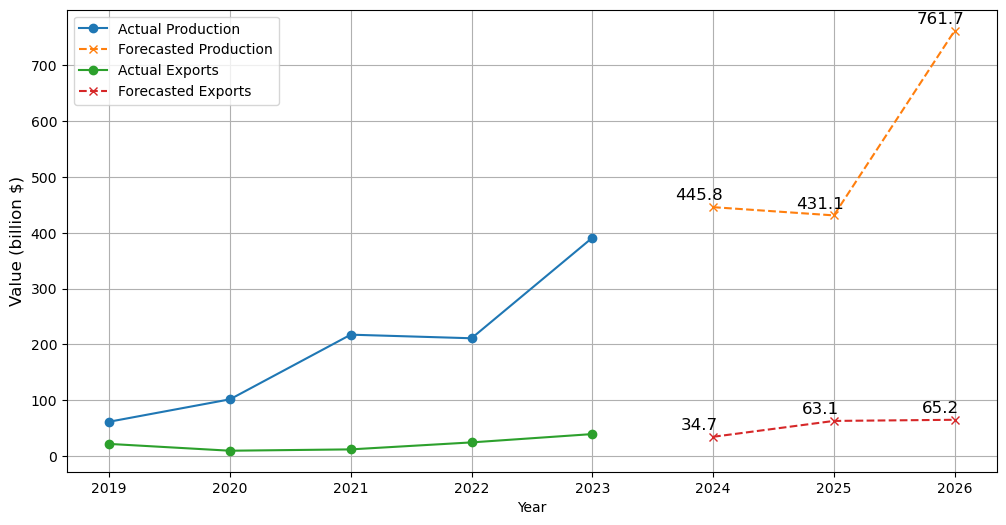

In [10]:
# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Production_in_dollars'], label='Actual Production', marker='o')
plt.plot(forecast_df.index, forecast_df['Production_in_dollars'], label='Forecasted Production', marker='x', linestyle='--')

plt.plot(data.index, data['Exports'], label='Actual Exports', marker='o')
plt.plot(forecast_df.index, forecast_df['Exports'], label='Forecasted Exports', marker='x', linestyle='--')

# 标注预测值
for year in forecast_df.index:
    plt.annotate(f"{forecast_df['Production_in_dollars'].loc[year]:.1f}", 
                 (year, forecast_df['Production_in_dollars'].loc[year]), 
                 textcoords="offset points", xytext=(-10,5), ha='center', fontsize=12)
    plt.annotate(f"{forecast_df['Exports'].loc[year]:.1f}", 
                 (year, forecast_df['Exports'].loc[year]), 
                 textcoords="offset points", xytext=(-10,5), ha='center', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Value (billion $)', fontsize=12)
# plt.title('Production and Exports: Actual vs Forecasted')
plt.legend()
plt.grid(True)
plt.show()